
# Activity (6/12/2025)
*   The goal of this dataset is to find features and predict which job description are fraudulent and real.
*   Identify key traits/features (words, entities, phrases) of job descriptions which are fraudulent in nature.


## Import libraries

In [237]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("shivamb/real-or-fake-fake-jobposting-prediction")
csv_file_path = os.path.join(path, 'fake_job_postings.csv')
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/real-or-fake-fake-jobposting-prediction


In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [239]:
df = pd.read_csv(csv_file_path)

## Pre-requisities of data analyzation.

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [241]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [242]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Cleaning Data

### Identify columns with the least importance and consider dropping them.

In [243]:
df.isnull().sum().sort_values(ascending=False)

,0
salary_range,15012
department,11547
required_education,8105
benefits,7212
required_experience,7050
function,6455
industry,4903
employment_type,3471
company_profile,3308
requirements,2696


In [244]:
# Since salary has the most number of null values. We can remove it.
df_drop = df.drop(columns=['salary_range', 'job_id'])
df_drop.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [245]:
df_drop.nunique()

,0
title,11231
location,3105
department,1337
company_profile,1709
description,14801
requirements,11967
benefits,6204
telecommuting,2
has_company_logo,2
has_questions,2


In [246]:
# Viewing all the values of each column
for col in df_drop.columns:
    print(f"\nColumn: {col}")
    for val in df_drop[col].unique():
        print(f"  - {val}")

Streaming output truncated to the last 5000 lines.
  -        Stock Options (Company is also Pre-IPO)·         Large Annual Bonuses·         Comprehensive medical, dental and vision plans·         Life Insurance·         Flexible Spending Account (FSA)·         Dependent Care Spending·         Disability coverage (short-term and long term)·         401 Fidelity Investments·         LEED certified working environment·         Casual dress·         Catered lunches·         Monthly mixers·         Yoga class·         Masseuse onsite 
  - DOE 
  - Our offer: If you are seeking a career in an exciting and dynamic company, where you will offer your services as part of a team of a major European Institution, operating in an international, multilingual and multicultural environment where you can expect real chances to make a difference, please send us your detailed CV in English, quoting reference: (PCL/02/14), to the following e-mail address: #EMAIL_e8efcf62a68b682bfb8fcc86c8c05ec5b0b8c9afa33

In [247]:
placeholders = ['unspecified', 'n/a', 'none', 'not available', 'N/A', 'None', '']
columns = [
    'employment_type',
    'required_experience',
    'required_education',
    'industry',
    'function',
    'department',
    'benefits',
    'location',
    'requirements',
    'description'
]

for col in columns:
    df_drop[col] = df_drop[col].replace(placeholders, pd.NA).fillna('Unknown')

## Data Visualization

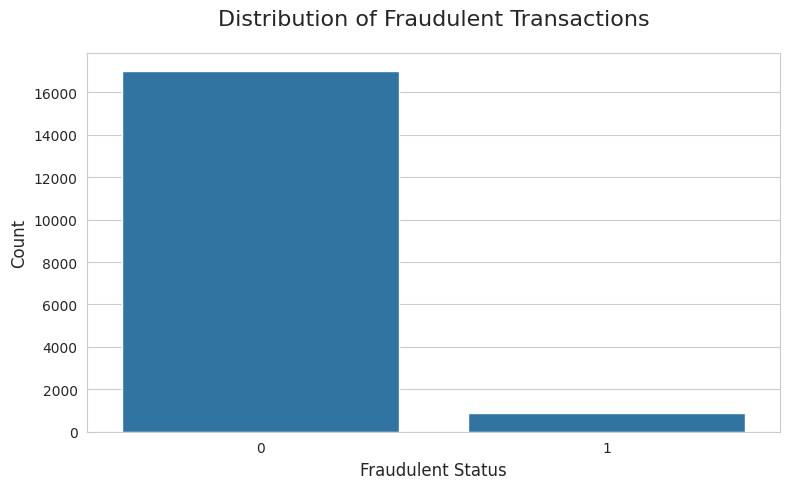

In [248]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
plt.title('Distribution of Fraudulent Transactions', fontsize=16, pad=20)
plt.xlabel('Fraudulent Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.countplot(data=df_drop, x="fraudulent")
plt.tight_layout()
plt.show()

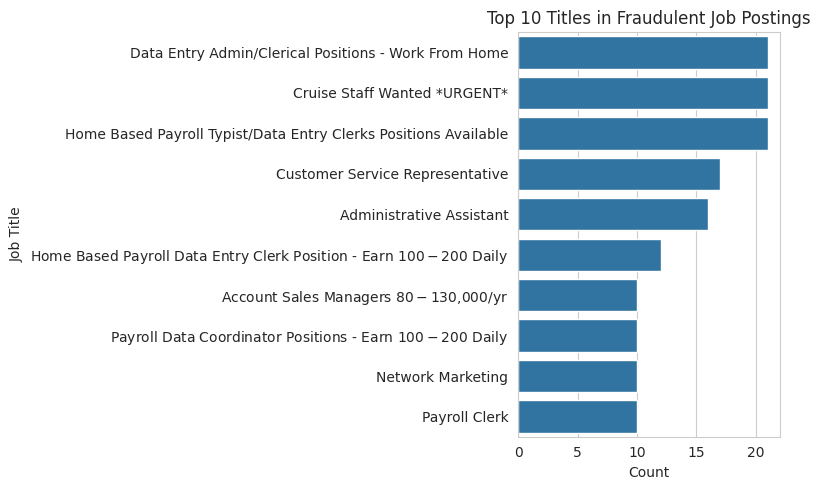

In [249]:
# Top job titles labeled as fraudulent.

fraud_titles = df_drop[df_drop['fraudulent'] == 1]['title'].value_counts().nlargest(10)
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_titles.values, y=fraud_titles.index)
plt.title("Top 10 Titles in Fraudulent Job Postings")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


<ipython-input-250-554772840>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_drop, x=col, y='fraudulent', ci=None, ax=ax)
<ipython-input-250-554772840>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_drop, x=col, y='fraudulent', ci=None, ax=ax)
<ipython-input-250-554772840>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_drop, x=col, y='fraudulent', ci=None, ax=ax)


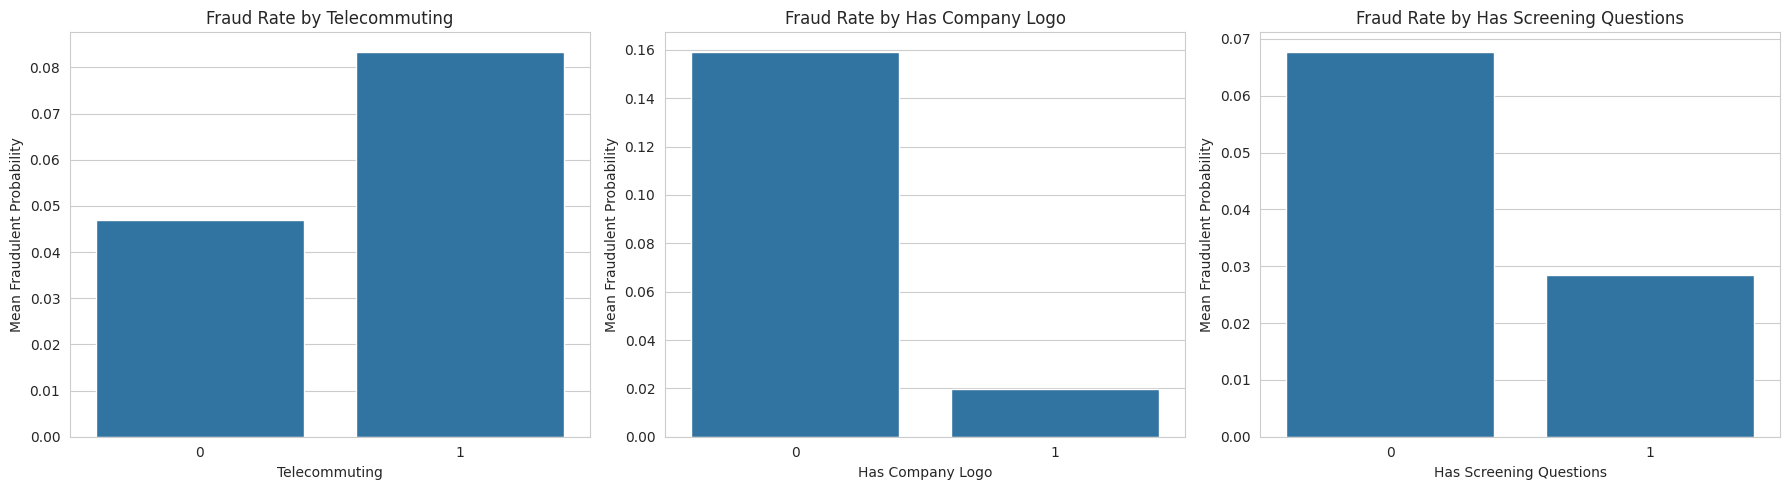

In [250]:
# Fraud rate by telecommuting, has_company_logo, has_questions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']
titles = ['Telecommuting', 'Has Company Logo', 'Has Screening Questions']

for ax, col, title in zip(axes, binary_cols, titles):
    sns.barplot(data=df_drop, x=col, y='fraudulent', ci=None, ax=ax)
    ax.set_title(f"Fraud Rate by {title}")
    ax.set_ylabel("Mean Fraudulent Probability")
    ax.set_xlabel(title)

plt.tight_layout()
plt.show()

Insights:

1. The dataset is imbalanced, with more real job postings than fraudulent ones.
2.  We need to handle class imbalance during training such as oversampling.
3. Titles like Data Entry Clerk, Customer Service, and Administrative Assistant are more commonly found in fake postings. Often roles that scammers use to lure on job that has minimal effort.
4. Jobs that are fully remote show a slightly higher fraud rate.
5. Jobs without a company logo show to be fraudulent.
6. Jobs without screening questions show a higher likelihood of being fake.



In [251]:
# Well try to find correlation on the discrete values.

discrete_columns = [
    'employment_type',
    'required_experience',
    'required_education',
    'industry',
    'function',
    'department',
    'location',
    'fraudulent'
]

for col in discrete_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le = LabelEncoder()
    df_drop[col] = le.fit_transform(df_drop[col])

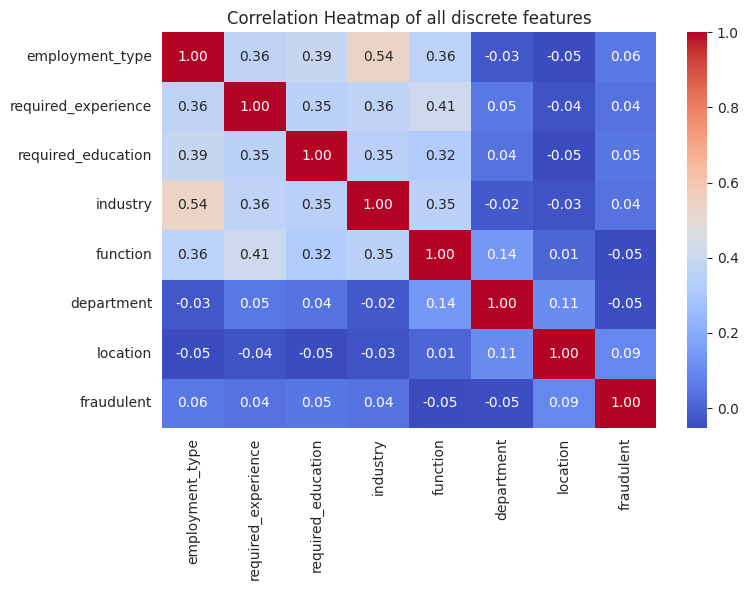

In [252]:
corr_matrix = df_drop[discrete_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of all discrete features")
plt.tight_layout()
plt.show()

No single discrete feature is a strong standalone predictor of fraud in this dataset.

But what approaches I saw is to combine features such us "industry" + "function" or "location" + "department" to further enhance the model performance on determining the fraud.

## Feature Engineering

In [253]:
# Frequency map encoding
for col in discrete_columns:
    freq_map = df_drop[col].value_counts(normalize=True)  # relative frequency
    df_drop[f'{col}_freq'] = df_drop[col].map(freq_map)

In [254]:
# Target encoding
for col in discrete_columns:
    target_mean = df_drop.groupby(col)['fraudulent'].mean()
    df_drop[f'{col}_target'] = df_drop[col].map(target_mean)

In [255]:
# Pairwise interactions
df_drop['industry_function'] = df_drop['industry'].astype(str) + "_" + df_drop['function'].astype(str)
df_drop['employment_education'] = df_drop['employment_type'].astype(str) + "_" + df_drop['required_education'].astype(str)

interaction_cols = ['industry_function', 'employment_education']
for col in interaction_cols:
    le = LabelEncoder()
    df_drop[col] = le.fit_transform(df_drop[col])

In [256]:
# Count encoding of interactions
for col in interaction_cols:
    count_map = df_drop[col].value_counts()
    df_drop[f'{col}_count'] = df_drop[col].map(count_map)


# Correlation heatmap for engineered features
engineered_features = [
    col for col in df_drop.columns
    if col.endswith('_freq') or col.endswith('_target') or col.endswith('_count') or col in discrete_columns
]

if 'fraudulent' not in engineered_features:
    engineered_features.append('fraudulent')


numeric_engineered_features = df_drop[engineered_features].select_dtypes(include=np.number).columns.tolist()
corr = df_drop[numeric_engineered_features].corr()


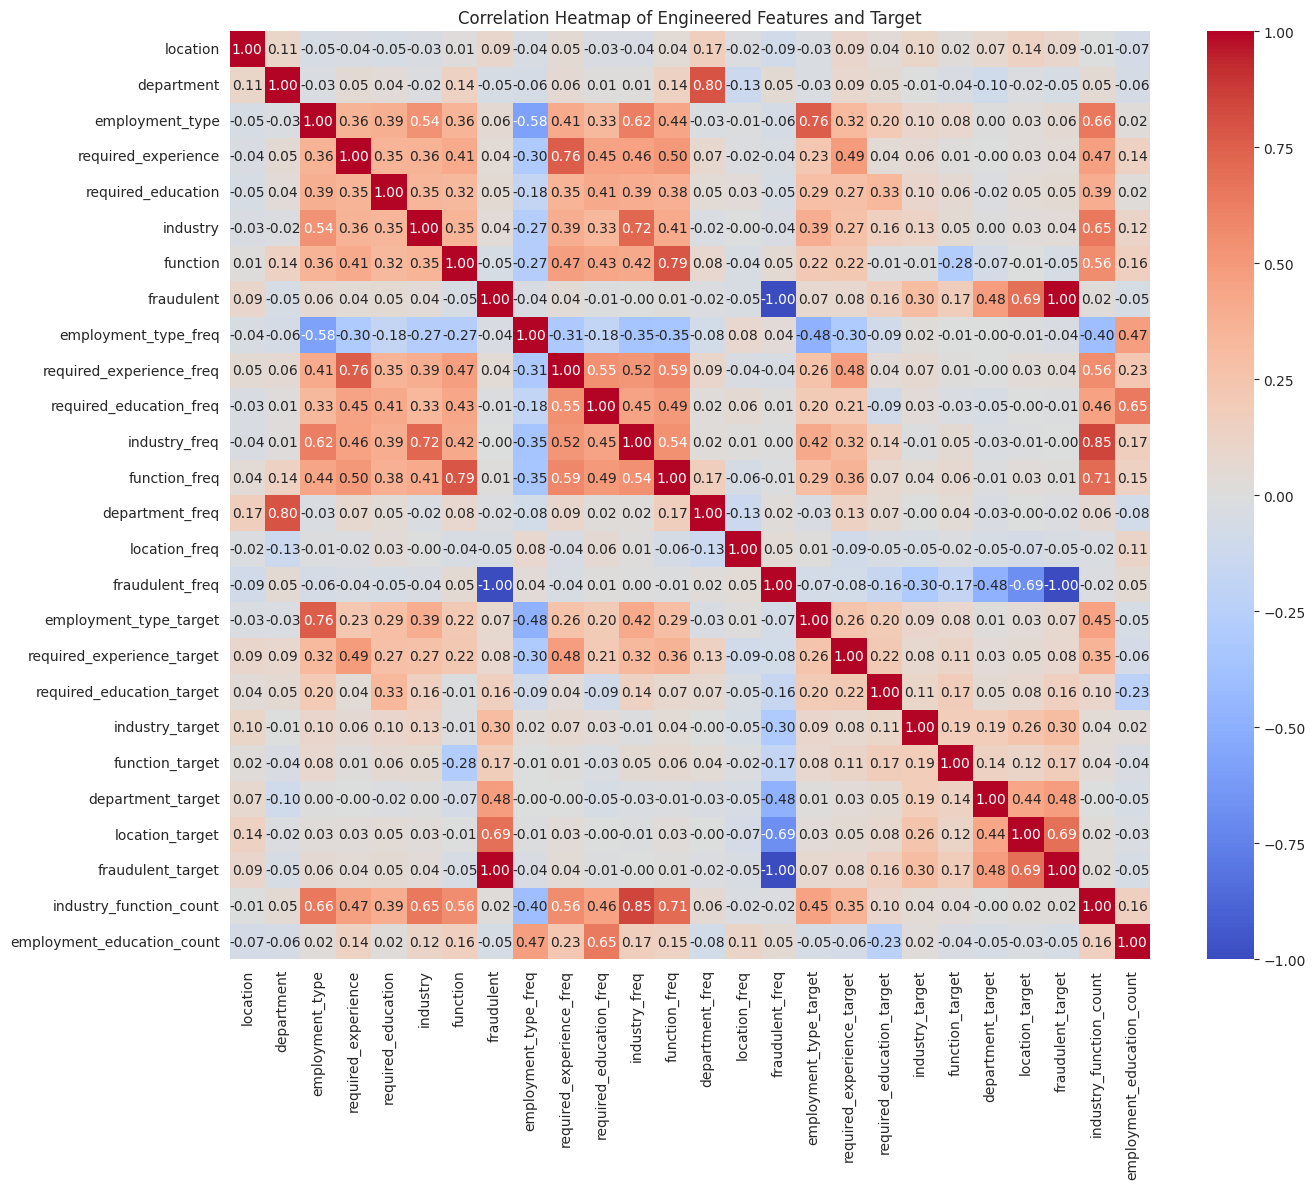

In [257]:
plt.figure(figsize=(14, 12)) # Increased figure size for better readability
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Engineered Features and Target")
plt.tight_layout()
plt.show()

In [258]:
engineered_features

['location',
 'department',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent',
 'employment_type_freq',
 'required_experience_freq',
 'required_education_freq',
 'industry_freq',
 'function_freq',
 'department_freq',
 'location_freq',
 'fraudulent_freq',
 'employment_type_target',
 'required_experience_target',
 'required_education_target',
 'industry_target',
 'function_target',
 'department_target',
 'location_target',
 'fraudulent_target',
 'industry_function_count',
 'employment_education_count']

Target encoding and interaction feature counts provide stronger signals for fraud detection.

In [259]:
# Drop features related to fraud.
engineered_features = [col for col in engineered_features if col not in ['fraudulent_freq', 'fraudulent_target' , 'fraudulent']]


## Model Training

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

importances = None

In [261]:
X = df_drop[engineered_features]
y = df_drop['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

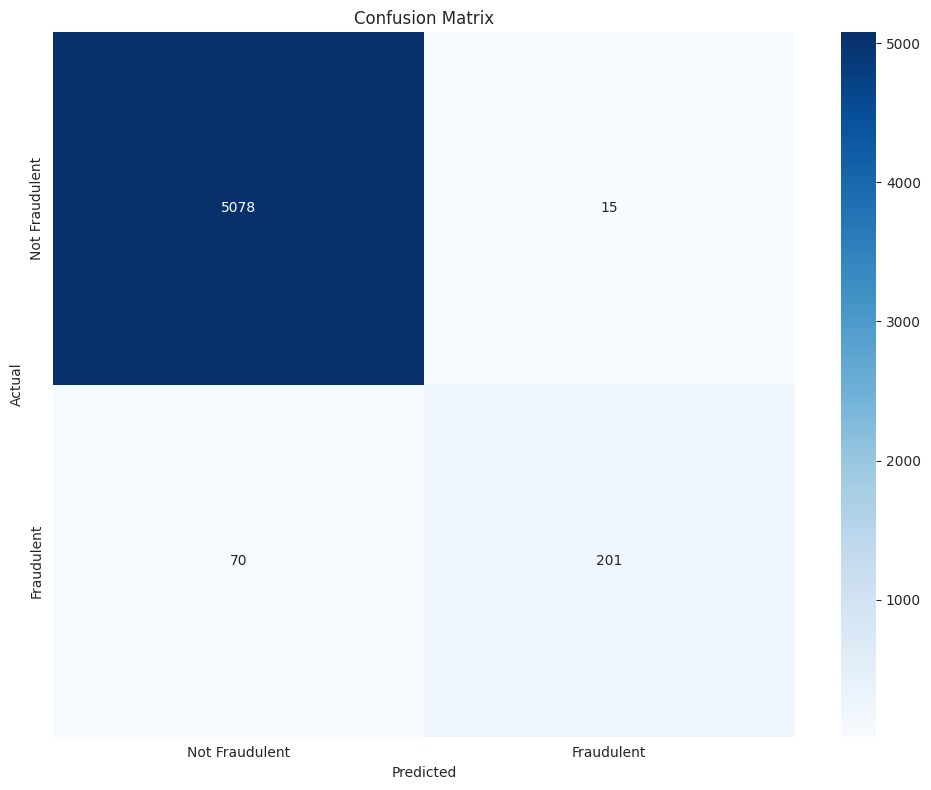

In [262]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraudulent', 'Fraudulent']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

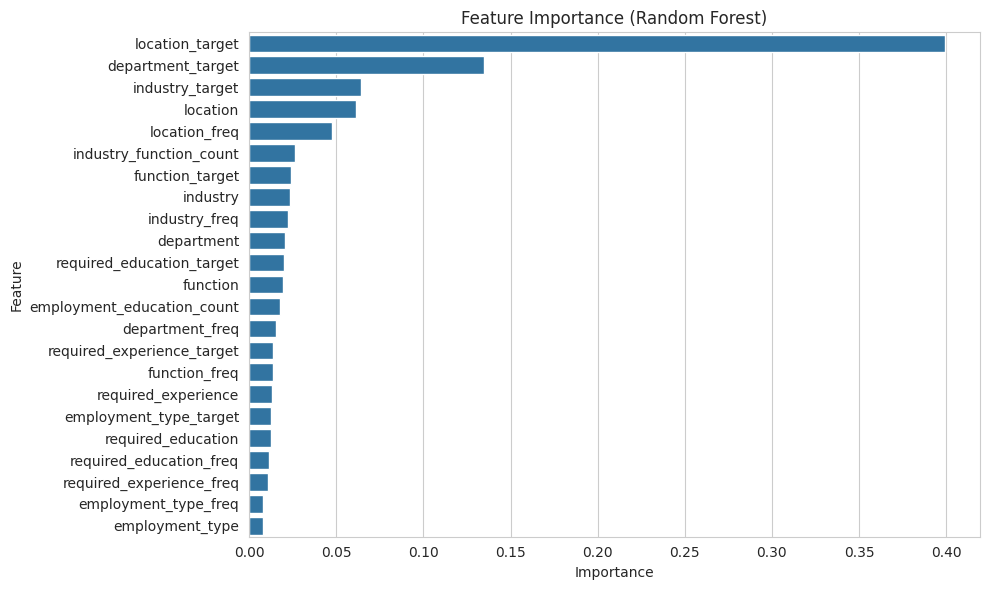

In [263]:
# Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['importance'], y=feature_importance_df['feature'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [264]:
# Classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

# Classification report
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9842
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       0.93      0.74      0.83       271

    accuracy                           0.98      5364
   macro avg       0.96      0.87      0.91      5364
weighted avg       0.98      0.98      0.98      5364

